
# Introduction to Data Science
## Homework 5- Naive Bayes, Count Vectorizer, ROC_AUC_Curve

    Student Name: Titash Mandal

    Student Netid:tm2761
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

<font color="blue"><h1>Answer</h1></font><p><font color="green">The bias-variance tradeoff indicates how accurate a classifer is at modeling different training sets. The variance of a classifier indicates how much its decisions are affected by small changes in training sets. Naive Bayes is a simple model with low-variance and high-bias which is likely to produce the same classification decision even from slightly different training data. Because of low-variance Naive Bayes model tends to generalize so well that it may not have sufficient accuracy.</font> 



<p>For Example:  In a spam detection classifier, our task is to categorize an email as a <b>SPAM or NOT A SPAM (HAM).</b> <font color="blue"><p>Let our vocabulary be: <p>(w1,w2,...,wn) where 1<=n<=30</p><p>Let the new email to classify have the words: (w1,w3,w7,w10,s) </font></p> 

<p>Now, since this word s is not present in the vocabulary, its count is 0.</p>

<b><p>P(s|Ham)=P(s|Spam)=0
Suddenly,</p></b>

<b><p>P(w1,w3,w7,w10,s|Ham)=P(w1,w3,w7,w10,s|Ham)∗P(s|Ham)=0
and</p></b>
<b><p>P(w1,w3,w7,w10,s|Spam)=P(w1,w3,w7,w10,s|Spam)∗P(s|Spam)=0
</p></b>
<p> This email might have other words w1,w3,w7,w10 which have strong factors to classify it as spam or not spam. However, due to the absense of one word in the vocabulary, the result varies widely. This is a problem in real life data science which can be resolved by the <b>Laplace Smoothing.</b> The Laplace smoothing adds a 1 to the numerator and a different factor to the denominator to remove the effect of any new word coming with the test dataset, which keeps the variance low and tries to classify the emails with better accuracy.</p>

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [3]:
import pandas as pd
data =pd.read_csv("imdb.csv")
#Checking to see if there are NaN values in the dataframe's "Class" column
#We can remove it as it's neither P or N and will not be useful for text mining.
print("NaN values? ",data['Class'].isnull().sum())
data=data.dropna(subset=['Class'])
print("NaN values after removing? ",data['Class'].isnull().sum())


NaN values?  1
NaN values after removing?  0


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [2]:
# Code here
data.loc[data['Class']=='P','Class']=1
data.loc[data['Class']=='N','Class']=0

#len(data[data['Class']==0])

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [3]:
from sklearn.cross_validation import train_test_split
#putting all of the text into a data frame called X
X = data['Text']
#target variable in a data frame called Y
Y = data['Class']
#We will be passing these values to the classifiers which expects categorical values as the target vector.
#The 0's and 1's we had added were noy of integer format so we need to change it to that format.
#We need to convert it to int it so so it will be accepted as input.
Y=Y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)


/Users/titashmandal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#creating a binary countVectorizer to transform the text to numbers so that the ML algorithm can work on it.
sklearn_CV=CountVectorizer(binary=True,stop_words='english')
#This first creates a dictionary of vocabulary of words
x_trainCV=sklearn_CV.fit_transform(X_train)
#Using the vocabulary to create co-ordinate format matrix of words which stores a list of (row, column, value) tuples.
#this is the sparse matrix which stores counts of each word in the test data set based on the vocabulary from the train data set supplied.
x_testCV=sklearn_CV.transform(X_test)


#Creating a binary TfidfVectorizer()
#Smooth idf(default=True) weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.
sklearn_tfidf = TfidfVectorizer(binary=True,stop_words='english')
x_train_tfidf=sklearn_tfidf.fit_transform(X_train)
x_test_tfidf = sklearn_tfidf.transform(X_test)



<html><h1>References</h1>
<p><a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf">Term Frequency and Inverse Document Frequency</a>
<p><a href="https://www.youtube.com/watch?v=bPYJi1E9xeM">Video Tutorial</a></p>
<p><a href="http://blog.christianperone.com/2011/09/machine-learning-text-feature-extraction-tf-idf-part-i/"> Blog Tutorial</a></p>
</p></html>

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [6]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

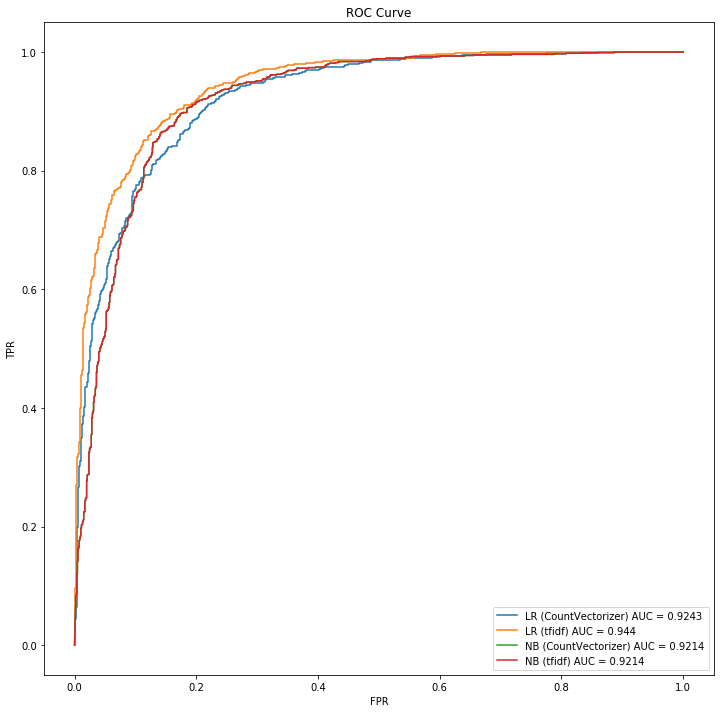

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

#making a logistic regression model and a NB model
logisticR=LogisticRegression()
bernoulliNB=BernoulliNB()

def roc_auc_curve_fitter(model,labels):
    for vectorizer in [(x_trainCV,x_testCV,"CountVectorizer"),(x_train_tfidf,x_test_tfidf,"tfidf")]:
        model.fit(vectorizer[0],Y_train)
        prediction=model.predict_proba(vectorizer[1])[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test,prediction)
        auc_test= metrics.roc_auc_score(Y_test,prediction)
        c = (np.random.rand(), np.random.rand(), np.random.rand())
        plt.plot(fpr, tpr, label=labels + " (" + vectorizer[2] + ") AUC = " + str(round(auc_test, 4)))
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        
    
roc_auc_curve_fitter(logisticR,"LR")
roc_auc_curve_fitter(bernoulliNB,"NB")



In [8]:
#Printing the number of 0's and 1's ie the number of positive and negative classes.
print(Y_test.value_counts())
# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1092
null_accuracy = Y_test.value_counts().head(1) / len(Y_test)
print('Null accuracy:', null_accuracy*100)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1070 / (1070 + 1055))*100)

1    1070
0    1055
Name: Class, dtype: int64
Null accuracy: 1    50.352941
Name: Class, dtype: float64
Manual null accuracy: 50.72941176470588


<h2>Which of the two models is generally better at ranking the test set?</h2>
<br></br>
<font color='blue'><p>An ROC curve is the most commonly used way to visualize the performance of a binary classifier, and AUC is (arguably) the best way to summarize its performance in a single number.</p></font>
<font color="green"><p>Here we are comparing the Logistic Regression model with the Bernoulli Naive Bayes model. We have seen that the AUC score for LR for the TF-IDF MODEL is the highest. Hence the LR model performs better at ranking the test set. The logistic regression estimates the probability(y/x) directly from the training data by minimizing error. Hence this is a Discriminative model. Naive Bayes assumes all the features are conditionally independent and so, if some of the features are dependent on each other, the prediction might be poor.
Logistic regression however splits the feature space linearly, it works better even if some of the variables are correlated </p></font>

<font color="red"><p>The Naive Bayes gives identical performance for both the CountVectorizer and the TF-IDF model. Naive Bayes calculates the conditional probability ie it chooses the output label y to assign an input x, choosing the y that maximizes P(y|x). In general if there are more positive words in the test dataset, it will label them as P ie 1 else 0 ie negative. It mainly depends on the test dataset. Also Naive Bayes is a low-variance and high-bias model. Hence with different ways to process the data, it gives very close results of accuracy ( similar accuracy in this case). Hence it gives the same result despite using CountVectorizer or TF-IDF model.</p></font>
    

<h1>References</h1>
<p><a href="http://www.dataschool.io/roc-curves-and-auc-explained/">Video tutorial</a></p>
<p><a href="http://sebastianraschka.com/Articles/2014_naive_bayes_1.html">Blog</a></p>

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [53]:
logisticR=LogisticRegression()
logisticR.fit(x_train_tfidf,Y_train)
prediction=logisticR.predict(x_test_tfidf)
count=0
incorrect=[]
Y_test_list=Y_test.sort_index().tolist()

X_test_list=X_test.sort_index().tolist()
for i in range(len(prediction)):
    #examples that should have been positive, but were incorrectly classified as negative.
    if(prediction[i]!=1 and Y_test_list[i]==1 and count<=5 ):
        count+=1
        incorrect.append(X_test_list[i])
    elif(count==5):
        break



<html>Another method to print the incorrect predictions:</html>

In [52]:
import numpy as np
model = LogisticRegression()

model.fit(x_train_tfidf, Y_train)
predictions = model.predict(x_test_tfidf)

Y_test.sort_index()
positive_locations = np.where(Y_test == 1)[0]
wrong_entries = np.where(predictions[positive_locations] != Y_test[positive_locations])[0]

X_test[wrong_entries]

0                                                     NaN
3                                                     NaN
4                                                     NaN
5       'There is no greater disservice to do to histo...
6                                                     NaN
8                                                     NaN
9                                                     NaN
11                                                    NaN
14                                                    NaN
15      'I appreciate movies like this: smart and well...
16      'When I read the summary of the movie somethin...
17                                                    NaN
18                                                    NaN
19                                                    NaN
20      'Im really suprised this movie didnt get a hig...
21                                                    NaN
22                                                    NaN
23            

<h1>List of 5 examples the should have been positive, but were incorrectly classified as negative.</h1>

In [50]:
for item in incorrect:
    print(item)
    print()

'There is no greater disservice to do to history than to misrepresent it. This takes the easiest and most shallow route simply portraying him as a monster. Only showing his negative sides and exaggerating them. Those who are ignorant of the past doom us to repeat it. He was a human being. That may prove tough to some people to accept but an important part of life is facing that which we dont want to. Rather than demonizing the man we ought to try to understand him. Otherwise we stand little chance of preventing anyone similar in the future or possibly even the present from succeeding at anything of remotely comparable scope as far as damage and misery goes. Hate him and what he did dont make him into something mythical intentionally or otherwise. Frankly far too much of this mini-series could play dumb dumb *duuum*! after or during scenes. The whole thing nods nudges and winks at the audience with a clear message of was this guy evil or what incorporating every single bad trait(as well

<font color="red"><h1>WHY DOES THIS HAPPEN?</h1></font>
<p>Logistic regression is trained with <b>conditional maximum likelihood estimation.</b>
This means we choose the parameters w that maximize the (log) probability of the y
labels in the training data given the observations x. If we have multiple occurences of a word or feature in the test dataset, then we multiply the word's weight factor with the number of times it occurs in the dataset. In these examples if the word's which are negative have a greater total weight attached with them, they will cause the dataset to be labeled as negative instead of positive. Hence the observed discrepancy. Every model has sensitivity and specificity. They are characteristics which help us determine the performance of a model.
</p>

Explanation for the 5 reviews chosen here!